In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os

In [ ]:
train_df = pd.read_excel('Data_Train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.shape

(10683, 11)

In [6]:
type(train_df)

pandas.core.frame.DataFrame

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_df.Duration.value_counts()

Duration
2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 10m      1
31h 30m      1
42h 5m       1
4h 10m       1
5m           1
Name: count, Length: 368, dtype: int64

In [9]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_df.dropna(inplace=True)

In [11]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [12]:
train_df['Journy_Day'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day

In [13]:
train_df['Journy_Month'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [14]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
train_df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [16]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
## Departure time is when the plane leaves the gate

# Ensure 'Dep_Time' column exists before extracting
if 'Dep_Time' in train_df.columns:
    train_df['Dep_hour'] = pd.to_datetime(train_df.Dep_Time).dt.hour
    train_df['Dep_min'] = pd.to_datetime(train_df.Dep_Time).dt.minute
    train_df.drop(['Dep_Time'], axis=1, inplace=True)
else:
    print("'Dep_Time' column not found in train_df. Assuming it was already processed.")

C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\3183658550.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_hour'] = pd.to_datetime(train_df.Dep_Time).dt.hour
C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\3183658550.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_min'] = pd.to_datetime(train_df.Dep_Time).dt.minute


In [18]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
## Arrival time is when the plane pulls up to the gate

# Ensure 'Arrival_Time' column exists before extracting
if 'Arrival_Time' in train_df.columns:
    train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
    train_df['Arrival_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute
    train_df.drop(['Arrival_Time'], axis=1, inplace=True)
else:
     print("'Arrival_Time' column not found in train_df. Assuming it was already processed.")

C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\979308012.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\979308012.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute


In [20]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
duration = list(train_df.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:                       # Check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adding 0 mins
        else:
            duration[i] = "0h " + duration[i]


duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))    # Extract hours from Duration
    duration_mins.append(int(duration[i].split('m')[0].split()[-1]))  # Extract onlye minutes from Duration


In [22]:
train_df["Duration_hours"] = duration_hours
train_df["Duration_mins"] = duration_mins

In [23]:
train_df.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,5,10,55,19,15,8,20


In [24]:
train_df.drop(['Duration'], axis=1, inplace=True)

In [25]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

In [26]:
train_df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

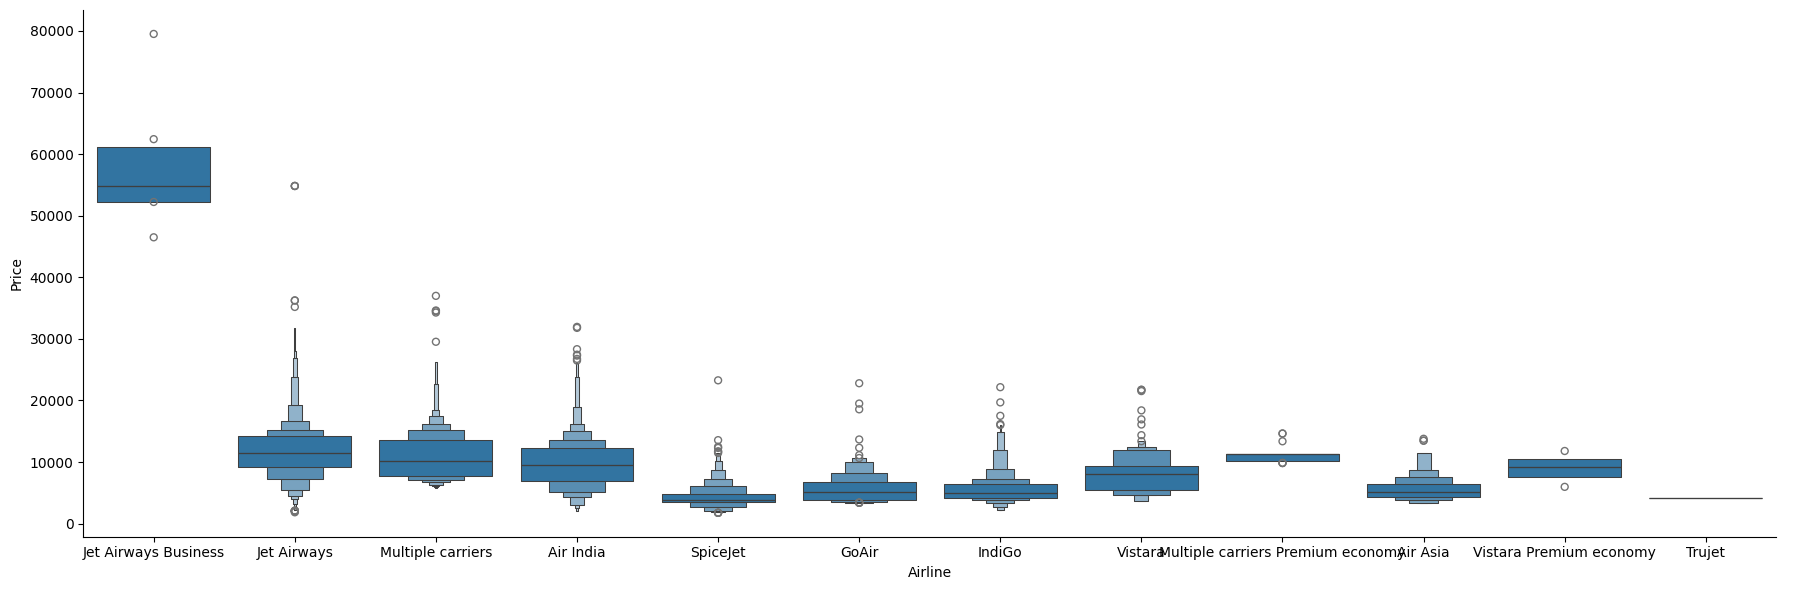

In [27]:
sns.catplot(y="Price", x="Airline", data=train_df.sort_values("Price", ascending=False), kind='boxen', height=6, aspect=3)

In [28]:
len(train_df['Airline'].unique())

12

In [29]:
Airline = train_df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [30]:
train_df.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

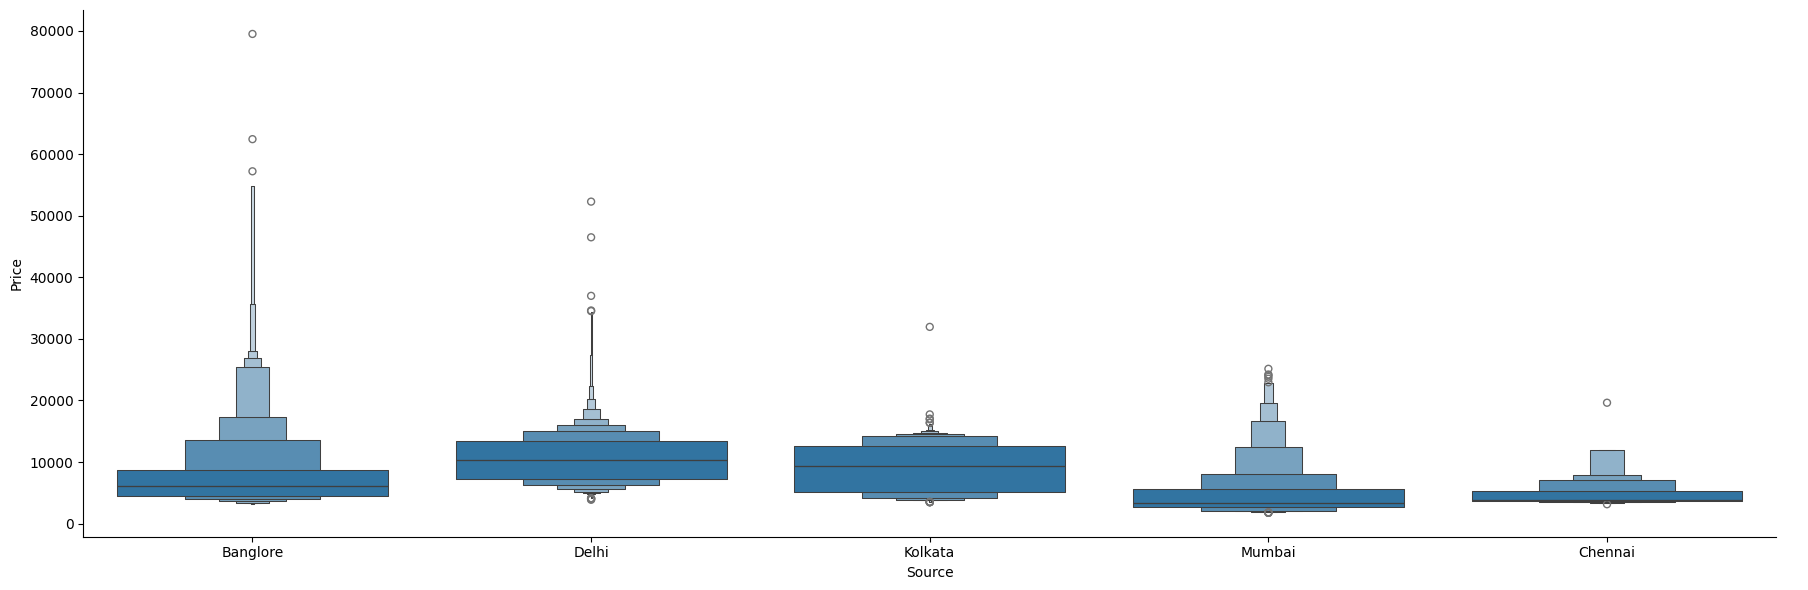

In [31]:
sns.catplot(y='Price', x='Source', data=train_df.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)

In [32]:
Source = train_df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [33]:
Destination = train_df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [34]:
train_df.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [35]:
a = train_df.Additional_Info=='No info'

In [36]:
a.mean()

np.float64(0.781127129750983)

In [37]:
train_df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [38]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [39]:
train_df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [40]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\2949072289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)


In [41]:
columns_to_include = ['Total_Stops', 'Price', 'Journy_Day', 'Journy_Month',
                      'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
                      'Duration_hours', 'Duration_mins']

missing_cols_in_train_df = [col for col in columns_to_include if col not in train_df.columns]
if missing_cols_in_train_df:
    print(f"Warning: Missing expected columns in train_df before concatenation: {missing_cols_in_train_df}")
data_train = pd.concat([train_df[columns_to_include], Airline, Source, Destination], axis=1)

In [42]:
data_train.head()

,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [43]:
data_train.head()

,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [44]:
data_train.shape

(10682, 30)

## Test Set

In [ ]:
test_data = pd.read_excel('Test_set.xlsx')

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
test_data.shape

(2671, 10)

In [48]:

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\3119377481.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\3119377481.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\aradh\AppData\Local\Temp\ipykernel_32052\3119377481.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
C:\Users\aradh\AppData

In [49]:
data_test.shape

(2671, 28)

In [50]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


## Feature Selection

In [51]:
data_train.head()

,Total_Stops,Price,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [52]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journy_Day', 'Journy_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
# Define X and y using the corrected data_train
# Ensure 'Price' is the target variable y
X = data_train.drop('Price', axis=1)
y = data_train['Price']

# Ensure boolean columns are converted to int
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

In [54]:
X.head()

,Total_Stops,Journy_Day,Journy_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

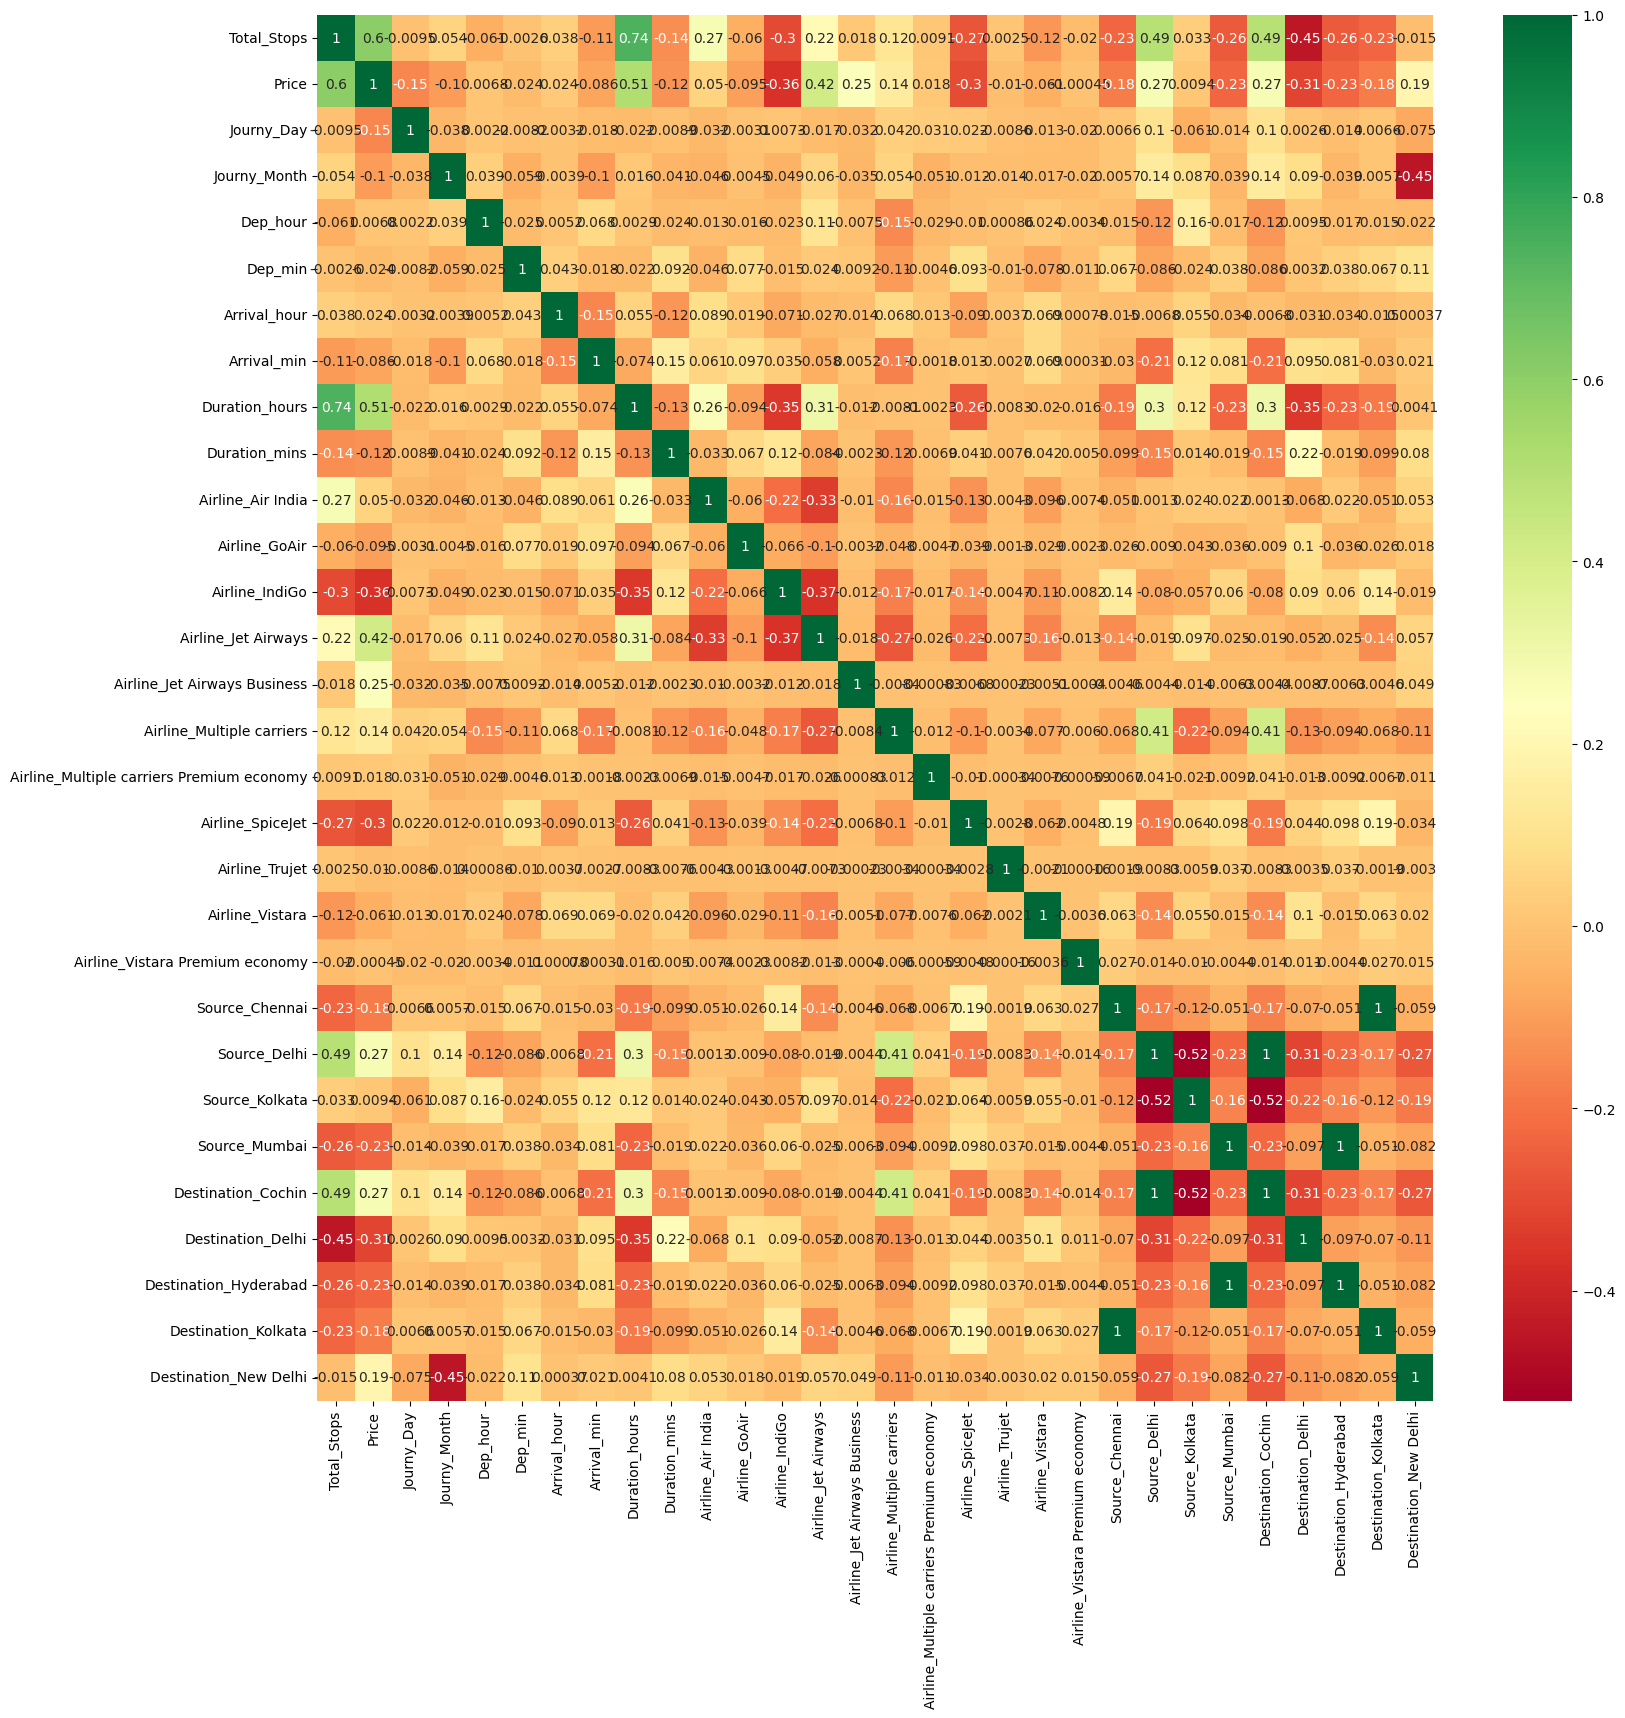

In [56]:
plt.figure(figsize=(18, 18))
sns.heatmap(data_train.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.show()

In [57]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [58]:
print(selection.feature_importances_)

[2.49424672e-01 1.44363389e-01 5.30939723e-02 2.43391248e-02
 2.12743702e-02 2.73646669e-02 1.93611785e-02 1.03295351e-01
 1.76472926e-02 9.33280798e-03 1.77543402e-03 1.74154582e-02
 1.42890570e-01 6.71679475e-02 1.93966991e-02 8.61163479e-04
 2.84494313e-03 8.94193087e-05 5.16051886e-03 9.15523394e-05
 4.88398668e-04 9.82673972e-03 3.21923782e-03 6.62523648e-03
 7.68278275e-03 1.30726614e-02 6.76940215e-03 4.66770853e-04
 2.46582394e-02]


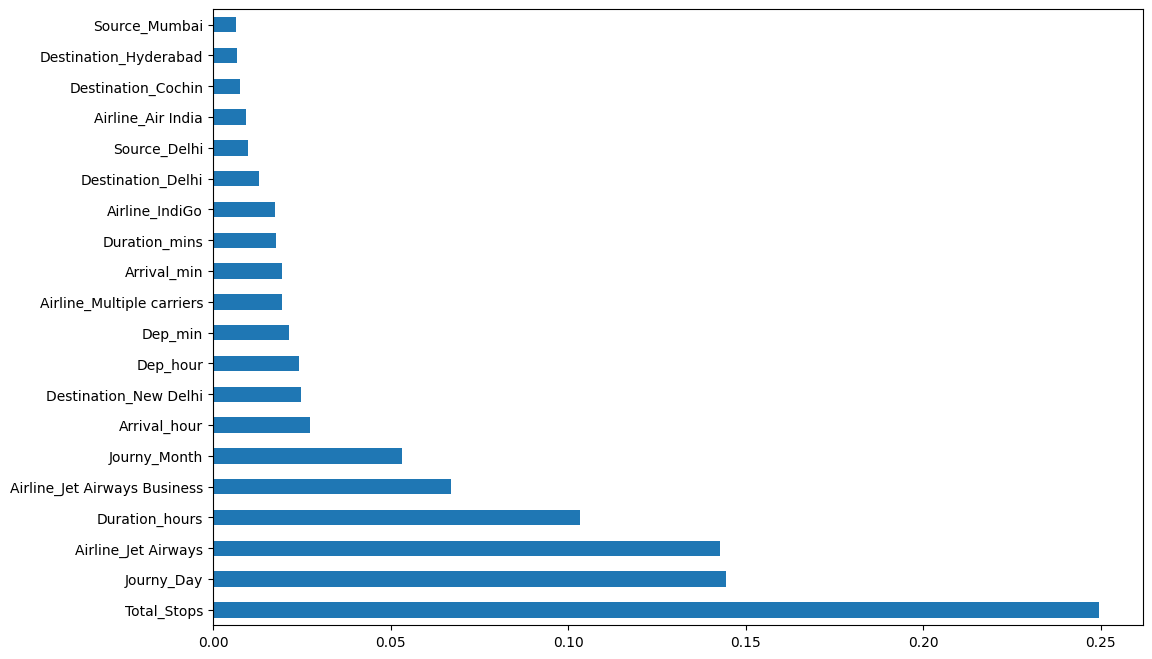

In [59]:
plt.figure(figsize=(12, 8))
feature_imp = pd.Series(selection.feature_importances_, index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

## Training part

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print(f"Random Forest Training Accuracy: {rf_model.score(X_train, y_train)}")

Random Forest Training Accuracy: 0.9538315114273734


In [62]:
y_pred = rf_model.predict(X_test)
r2_score_test = rf_model.score(X_test, y_test)
print(f"Random Forest R2 Score (Test): {r2_score_test}")

Random Forest R2 Score (Test): 0.7979876315305772


In [63]:
from sklearn.tree import DecisionTreeRegressor
import os

# Train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
print(f"Decision Tree Training Accuracy: {dt_model.score(X_train, y_train)}")

Decision Tree Training Accuracy: 0.9692484150527355


In [64]:
# Evaluate the performance of the Decision Tree model on the test set
y_pred_dt = dt_model.predict(X_test)
r2_dt = metrics.r2_score(y_test, y_pred_dt)
print(f"R2 score for Decision Tree model: {r2_dt}")

R2 score for Decision Tree model: 0.7245034671592279


In [65]:
from sklearn.linear_model import LinearRegression


# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f"Linear Regression Training Accuracy: {lr_model.score(X_train, y_train)}")

Linear Regression Training Accuracy: 0.6240840020468166


In [66]:
# Evaluate the performance of the Linear Regression model on the test set
y_pred_lr = lr_model.predict(X_test)
r2_lr = metrics.r2_score(y_test, y_pred_lr)
print(f"R2 score for Linear Regression model: {r2_lr}")

R2 score for Linear Regression model: 0.6195943729070101


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
import os

# Train a Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
print(f"Gradient Boosting Training Accuracy: {gbr_model.score(X_train, y_train)}")

Gradient Boosting Training Accuracy: 0.7825102431771656


In [68]:
# Evaluate the performance of the Gradient Boosting Regressor model on the test set
y_pred_gbr = gbr_model.predict(X_test)
r2_gbr = metrics.r2_score(y_test, y_pred_gbr)
print(f"R2 score for Gradient Boosting Regressor model: {r2_gbr}")

R2 score for Gradient Boosting Regressor model: 0.7856246475690609


In [70]:
from xgboost import XGBRegressor

# Train an XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
print(f"XGBoost Training Accuracy: {xgb_model.score(X_train, y_train)}")

XGBoost Training Accuracy: 0.9370537996292114


In [71]:
# Evaluate the performance of the XGBoost model on the test set
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = metrics.r2_score(y_test, y_pred_xgb)
print(f"R2 score for XGBoost model: {r2_xgb}")

R2 score for XGBoost model: 0.8459633588790894


In [72]:
from lightgbm import LGBMRegressor

# Train a LightGBM Regressor model
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
print(f"LightGBM Training Accuracy: {lgbm_model.score(X_train, y_train)}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 25
[LightGBM] [Info] Start training from score 9078.336688
LightGBM Training Accuracy: 0.8733020126116215


In [73]:
# Evaluate the performance of the LightGBM model on the test set
y_pred_lgbm = lgbm_model.predict(X_test)
r2_lgbm = metrics.r2_score(y_test, y_pred_lgbm)
print(f"R2 score for LightGBM model: {r2_lgbm}")

R2 score for LightGBM model: 0.8258346420388305


In [74]:
from catboost import CatBoostRegressor
import os

# Train a CatBoost Regressor model
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
print(f"CatBoost Training Accuracy: {catboost_model.score(X_train, y_train)}")

CatBoost Training Accuracy: 0.9103376381900707


In [75]:
# Evaluate the performance of the CatBoost model on the test set
y_pred_catboost = catboost_model.predict(X_test)
r2_catboost = metrics.r2_score(y_test, y_pred_catboost)
print(f"R2 score for CatBoost model: {r2_catboost}")

R2 score for CatBoost model: 0.863451648387598


In [76]:
model_performance = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Linear Regression', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Score (Train)': [rf_model.score(X_train, y_train), dt_model.score(X_train, y_train), lr_model.score(X_train, y_train), gbr_model.score(X_train, y_train), xgb_model.score(X_train, y_train), lgbm_model.score(X_train, y_train), catboost_model.score(X_train, y_train)],
    'R2 Score (Test)': [rf_model.score(X_test, y_test), r2_dt, r2_lr, r2_gbr, r2_xgb, r2_lgbm, r2_catboost]

})

display(model_performance)

,Model,Score (Train),R2 Score (Test)
0,Random Forest,0.953832,0.797988
1,Decision Tree,0.969248,0.724503
2,Linear Regression,0.624084,0.619594
3,Gradient Boosting,0.782510,0.785625
4,XGBoost,0.937054,0.845963
5,LightGBM,0.873302,0.825835
6,CatBoost,0.910338,0.863452


In [77]:
# Get the column names from the training data
train_cols = X.columns

# Get the column names from the test data
test_cols = data_test.columns

# Find columns in train_cols that are not in test_cols
missing_cols = set(train_cols) - set(test_cols)

# Add missing columns to data_test and fill with 0
for c in missing_cols:
    data_test[c] = 0

# Ensure the order of columns in data_test is the same as in X
data_test = data_test[train_cols]

# Convert boolean columns in data_test to integer
for col in data_test.columns:
    if data_test[col].dtype == 'bool':
        data_test[col] = data_test[col].astype(int)

# Verify the shapes and columns now match
print("Shape of X:", X.shape)
print("Shape of data_test after preprocessing:", data_test.shape)
print("Columns in X:", list(X.columns))
print("Columns in data_test:", list(data_test.columns))

Shape of X: (10682, 29)
Shape of data_test after preprocessing: (2671, 29)
Columns in X: ['Total_Stops', 'Journy_Day', 'Journy_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']
Columns in data_test: ['Total_Stops', 'Journy_Day', 'Journy_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple

In [78]:
predictions = catboost_model.predict(data_test)

In [79]:
print("Predicted Flight Prices:")
print(predictions)

Predicted Flight Prices:
[17447.81557219 12855.83125089 15514.54610432 ... 19101.62596744
 18322.84928993 17008.7196321 ]


In [80]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(catboost_model, f)